In [150]:
import csv
import pandas as pd, numpy as np, scipy as s
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
import csv
import pandas as pd, numpy as np, scipy as s
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [151]:
#top peformers are DT, NB, RF100, GB, SVML

In [152]:
df = pd.read_csv("smallset.csv")
df.pop("detail_desc")
df.columns
df1 = df.pop("article_id")
df["article_id"] = df1

In [153]:
processdf = pd.DataFrame()
for col in df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    le_vals = le.transform(df[col])
    processdf[col] = le_vals
X = processdf.iloc[:,:-1].values
y = processdf.iloc[:,33].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 1.612 -1.626 -1.417 ... -0.384  0.014 -0.183]
 [-0.68   0.615  0.705 ...  0.47   0.223  0.362]
 [-0.68   0.615  0.705 ... -1.239 -0.822 -0.365]
 ...
 [-0.68   0.615  0.705 ... -1.361 -1.449 -0.91 ]
 [-0.68   0.615  0.705 ... -1.239 -0.404  1.089]
 [-0.68   0.615  0.705 ... -1.361  1.06   0.908]]
[[-0.68   0.615  0.705 ... -1.605  1.269 -1.637]
 [ 0.084 -1.626 -1.417 ... -1.239 -0.195 -1.455]
 [-0.68   0.615  0.705 ...  1.447 -1.031 -0.728]
 ...
 [ 1.612 -1.626 -1.417 ... -1.361 -1.449 -0.91 ]
 [-0.68   0.615  0.705 ... -0.995 -0.404  1.089]
 [-0.68   0.615  0.705 ... -1.239 -1.24  -0.546]]
[370  98 383 423 376 343  62   7 319 519  83 496 218 383 495 480 317 344
 176 534 269  14 287 459 371 429 427 407 206 105  38 123 402 147  85 387
 163 313 503 378  66 130 234 390 169 181 399 395  60 286  85 457 284 301
 218 255 393 382 270  76 309 100  79 204 479 108  92 238 431 194 261 355
 167  49 198 156 410 137 113 447 373 253 183 273  75 174 500 433  50 349
 253 256 514 171   0 258 267 425 24

Text(0.5, 1.0, 'Correlation')

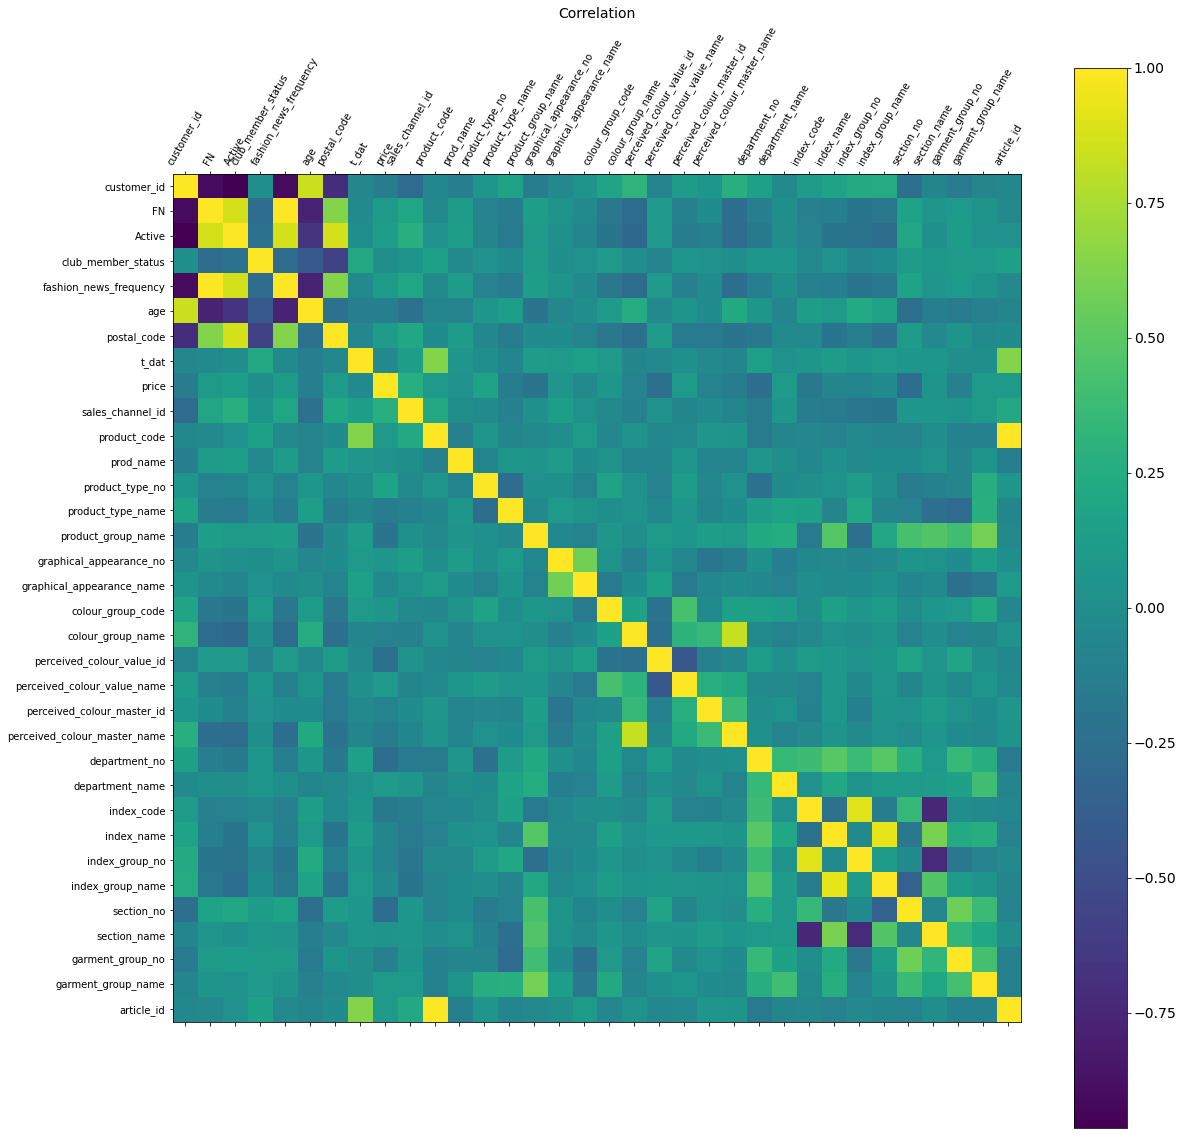

In [154]:
corr = processdf.corr()
fig = plt.figure(figsize=(19,19))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(processdf.select_dtypes(['number']).shape[1]),processdf.select_dtypes(['number']).columns,fontsize=10,rotation=60)
plt.yticks(range(processdf.select_dtypes(['number']).shape[1]),processdf.select_dtypes(['number']).columns,fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation', fontsize=14)

In [155]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
np.set_printoptions(precision=3)
print(processdf.columns)
print(fit.scores_)

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 't_dat', 'price',
       'sales_channel_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'article_id'],
      dtype='object')
[ 1381.635   188.174   231.073   680.625   188.174   127.51    139.63
 13576.51  11510.689    66.713 57262.431 55856.347  3703.803  5819.798
  1142.975  1495.159  1951.306  6213.457  9803.163   517.65    779.255
  1577.681  4320.091 12345.155  9798.192   962.7     793.

In [156]:
#df.pop("FN")
#df.pop("Active")
#df.pop("club_member_status")
#df.pop("prod_name")
#df.pop("postal_code")

In [157]:
acc = []
processdf = pd.DataFrame()
for col in df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    le_vals = le.transform(df[col])
    processdf[col] = le_vals
acc = []
X = processdf.iloc[:,:-1].values
y = processdf.iloc[:,33].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 1.636 -1.645 -1.432 ... -0.019  1.862  0.717]
 [-0.672  0.608  0.698 ... -1.363 -1.463 -0.899]
 [-0.672  0.608  0.698 ...  0.47  -1.256 -0.54 ]
 ...
 [-0.672  0.608  0.698 ...  0.47  -0.632 -1.258]
 [-0.672  0.608  0.698 ... -1.241 -0.424  1.076]
 [ 1.636 -1.645 -1.432 ... -1.241 -1.048 -0.72 ]]
[[-0.672  0.608  0.698 ... -1.241 -1.048 -0.72 ]
 [ 1.636 -1.645 -1.432 ... -1.363 -1.463 -0.899]
 [ 1.636 -1.645 -1.432 ... -1.241 -0.424  1.076]
 ...
 [-0.672  0.608  0.698 ... -0.752  0.615  1.256]
 [-0.672  0.608  0.698 ... -1.241 -0.424  1.076]
 [-0.672  0.608  0.698 ...  0.47  -1.048 -0.72 ]]
[113 405 128 484  35  35 319 131 441 170  76 496 238 355 103 282 102 325
 361 333 299 277 516 535  27 187  44 453 209 456  75 433 391 375 110 272
 114 328 286 490  12 404 462 524 270 162 439  62 198 208  73 340 422 455
 161 418 260 324 138   3 140  41 255 441 290 330 511 141 493 473   7 153
 443 266 419 145 511 352 245  83 170 484 453  53  63 373 311 505 469 216
 256 289  39 169 239  84 364 372 41

In [158]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("SciKitLearn")
print("Trees")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Trees
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Accuracy, Error
0.5205479452054794 0.4794520547945206


In [159]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("SciKitLearn")
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Naive Bayes
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.4794520547945205 0.5205479452054795


In [160]:
clf_svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("SciKitLearn")
print("SVM")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
SVM
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.4657534246575342 0.5342465753424658


In [161]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("SciKitLearn")
print("Random Forest 1000")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Random Forest 1000
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.4931506849315068 0.5068493150684932


In [162]:
gradient_booster = GradientBoostingClassifier(learning_rate=1)
gradient_booster.fit(X_train,y_train)
y_pred=gradient_booster.predict(X_test)
print("SciKitLearn")
print("Adaboost with decision trees")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Adaboost with decision trees
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Accuracy, Error
0.4246575342465753 0.5753424657534247


In [163]:
len(acc)

5

In [164]:
labs = ['DT', 'NB', 'SVML', 'RF100', 'GB']
len(labs)

5

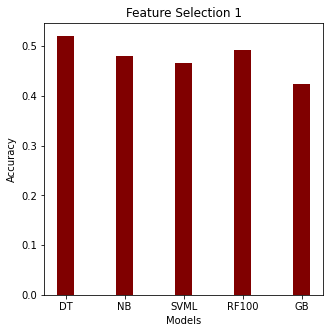

In [165]:
fig = plt.figure(figsize= (5, 5))
labs = ['DT', 'NB', 'SVML', 'RF100', 'GB']
plt.bar(labs, acc, color ='maroon',
        width = 0.3)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Feature Selection 1")
plt.show()

In [166]:
acc

[0.5205479452054794,
 0.4794520547945205,
 0.4657534246575342,
 0.4931506849315068,
 0.4246575342465753]

In [167]:
#next run

In [168]:
df.pop("FN")
df.pop("Active")
df.pop("club_member_status")
df.pop("prod_name")
df.pop("postal_code")

0      ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...
1      ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...
2      ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...
3      ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...
4      ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...
                             ...                        
724    bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...
725    bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...
726    bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...
727    bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...
728    bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...
Name: postal_code, Length: 729, dtype: object

In [169]:
acc = []
processdf = pd.DataFrame()
for col in df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    le_vals = le.transform(df[col])
    processdf[col] = le_vals
acc = []
X = processdf.iloc[:,:-1].values
y = processdf.iloc[:,28].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [170]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

In [171]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

In [172]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

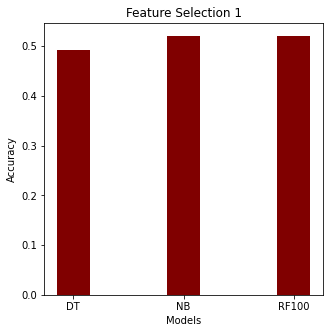

In [173]:
fig = plt.figure(figsize= (5, 5))
labs = ['DT', 'NB', 'RF100']
plt.bar(labs, acc, color ='maroon',
        width = 0.3)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Feature Selection 1")
plt.show()

In [174]:
acc

[0.4931506849315068, 0.5205479452054794, 0.5205479452054794]